In [1]:
  
import cv2
import numpy as np

# Read in the image in grayscale
#img = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('test.jpg')
cv2.imshow("l*a*b",img)
"""
lab = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
H,S,V=cv2.split(lab)
"""
lab = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)


L,A,B=cv2.split(lab)
cv2.imshow("l*a*b",img)
retval, threshold = cv2.threshold(A, 160, 175, cv2.THRESH_BINARY_INV)
# for i in range(0, 250, 5):
#     retval, threshold = cv2.threshold(A, i, i+5, cv2.THRESH_BINARY)
#     cv2.imshow("img_{}".format(i), threshold)

#A_RGB = cv2.cvtColor(A,cv2.COLOR_LAB2RGB)

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

params.filterByColor=1
params.blobColor= 0

params.filterByConvexity = False
params.filterByCircularity = False
# params.minCircularity = 0.2

params.filterByArea = False;
#params.minArea = 1000;
"""
# Change thresholds
params.minThreshold = 10;
params.maxThreshold = 200;
 
# Filter by Area.
params.filterByArea = True
params.minArea = 1500
 
# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1
 
# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87
 
# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01
"""
# Determine which openCV version were using
if cv2.__version__.startswith('2.'):
    detector = cv2.SimpleBlobDetector()
else:
    detector = cv2.SimpleBlobDetector_create()


# Detect the blobs in the image
keypoints = detector.detect(threshold)
print(len(keypoints))

# Draw detected keypoints as red circles
imgKeyPoints = cv2.drawKeypoints(threshold, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

#cv2.imshow("L_Channel",L) # For L Channel
#cv2.imshow("A_Channel",imgKeyPoints) # For A Channel 
#cv2.imshow("B_Channel",B) # For B Channel

    
# Display found keypoints
cv2.imshow("Keypoints", imgKeyPoints)
cv2.imshow("Threshold", threshold)
#cv2.imwrite('output_lab.jpg', imgKeyPoints)

cv2.waitKey(0)

cv2.destroyAllWindows()

3


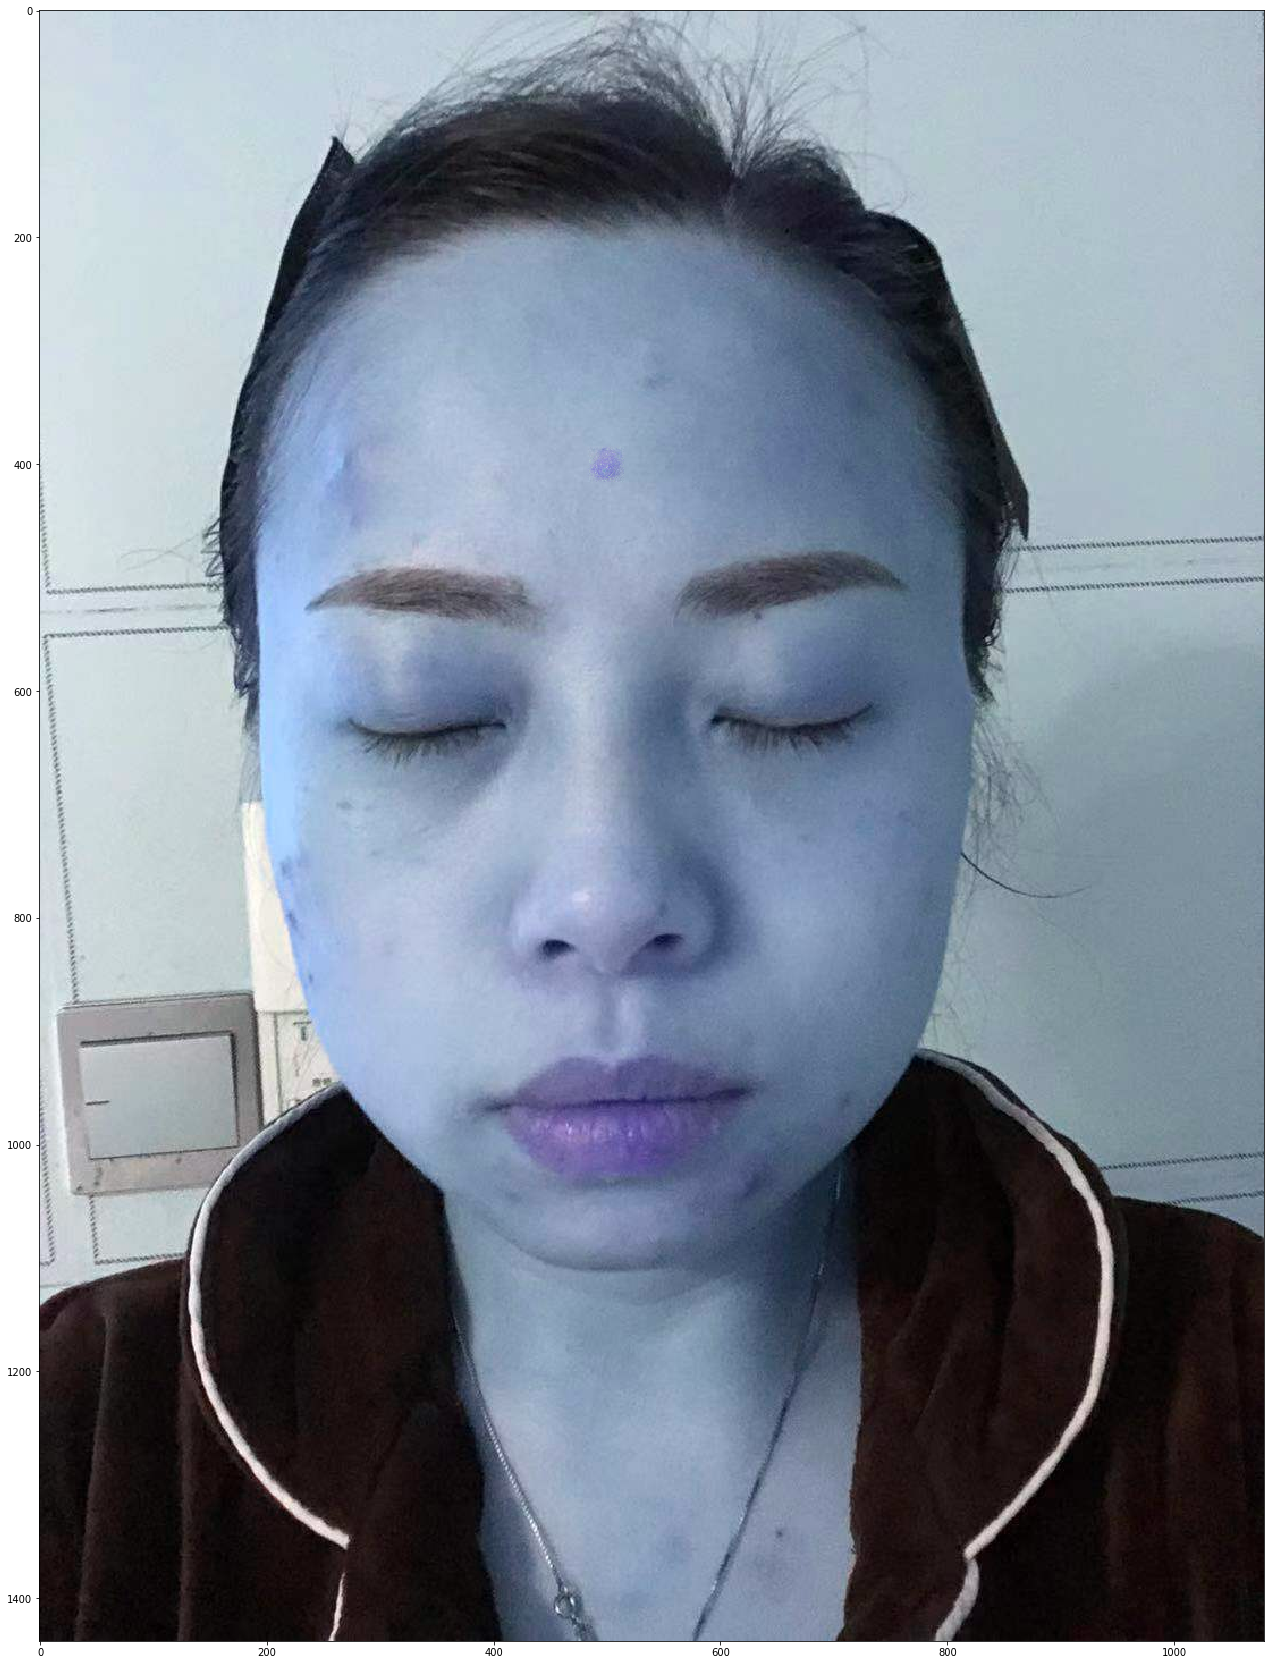

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
# Read images : src image will be cloned into dst
im = cv2.imread("111.jpg")
obj= cv2.imread("acne3.jpg")
 
# Create an all white mask
mask = 255 * np.ones(obj.shape, obj.dtype)
 
# The location of the center of the src in the dst
width, height, channels = im.shape
center = (500, 400)
 
# Seamlessly clone src into dst and put the results in output
normal_clone = cv2.seamlessClone(obj, im, mask, center, cv2.NORMAL_CLONE)
mixed_clone = cv2.seamlessClone(obj, im, mask, center, cv2.MIXED_CLONE)
# normal_clone = cv2.cvtColor(normal_clone, cv2.COLOR_BGR2RGB)
cv2.imwrite('result3.jpg', normal_clone)
plt.figure(figsize=(30,30))
plt.imshow(normal_clone)

# Write results
# cv2.imwrite("images/opencv-normal-clone-example.jpg", normal_clone)
# cv2.imwrite("images/opencv-mixed-clone-example.jpg", mixed_clone)